# DATA ANALYSIS (2)

After inspecting the 
***

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import histogram_bin_edges
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

from scipy.stats import ttest_ind
import seaborn as sns

import warnings

warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None



In [ ]:
df = pd.read_csv('output_cleaned_combined.csv')
df['is_win'] = df['is_win'].astype(int)

hero_id = pd.read_csv('hero_info.csv')

# grab data for win and loss
#df_win = df[df['is_win'] == 1]
#df_lose = df[df['is_win'] == 0]
df.head()

,hero_id_x,playtime.raw,kills_x,deaths_x,assists_x,hit_rate,player_uid,match_uid,attack_type,role,name,hero_id_y,is_win,kills_y,deaths_y,assists_y,hero_damage,hero_healed,damage_taken
0,1018,682,34,5,4,0.370249,2020018278,4891619_1740278739_468_11001_10,Projectile,VANGUARD,CPTKILLER310,1018,1,34,5,4,16854.329755,0.000000,26966.098306
1,1031,552,16,3,22,0.413103,135606949,4891619_1740278739_468_11001_10,Hitscan,STRATEGIST,xoiil,1031,1,17,6,23,7535.359508,25405.172459,7960.640990
2,1023,682,12,5,35,0.210819,244100036,4891619_1740278739_468_11001_10,Projectile,STRATEGIST,KingJ100,1023,1,12,5,35,3349.914821,25408.342077,5511.499575
3,1045,597,24,5,10,0.452899,227355910,4891619_1740278739_468_11001_10,Projectile,DUELIST,ZEGkS117,1045,1,25,6,10,21889.427433,0.000000,10382.466436
4,1043,682,31,4,0,0.366652,2110033791,4891619_1740278739_468_11001_10,Hitscan,DUELIST,DiegoU1507,1043,1,31,4,0,18191.594595,0.000000,9494.796316


In [5]:
params = ['id', 'name', 'attack_type', 'role']
hero_info_df = hero_id[params]
hero_info_df.head()


,id,name,attack_type,role
0,1011,Bruce Banner,Melee Heroes,VANGUARD
1,1014,The Punisher,Hitscan Heroes,DUELIST
2,1015,Storm,Projectile Heroes,DUELIST
3,1016,Loki,Projectile Heroes,STRATEGIST
4,1018,Doctor Strange,Projectile Heroes,VANGUARD


***
## Purpose

The goal of this file is to perform the same analysis as the first file but classify the data further into their respective roles.


Now lets attach the hero names on top of the data

In [6]:
# Map the data from hero info to the expanded data
#expanded_data['name'] = expanded_data['name'].fillna(expanded_data['hero_id_x'].map(hero_info_df.set_index('id')['name']))
#expanded_data['role'] = expanded_data['role'].fillna(expanded_data['hero_id_x'].map(hero_info_df.set_index('id')['role']))

df['hero_name'] = np.nan
df['role'] = np.nan

df['hero_name'] = df['hero_name'].fillna(df['hero_id_x'].map(hero_info_df.set_index('id')['name']))
df['role'] = df['role'].fillna(df['hero_id_x'].map(hero_info_df.set_index('id')['role']))

df_win = df[df['is_win'] == 1]
df_lose = df[df['is_win'] == 0]

df_van = df[df['role'] == 'VANGUARD']
df_supp = df[df['role'] == 'STRATEGIST']
df_dps = df[df['role'] == 'DUELIST']

df_van_w = df_van[df_van['is_win'] == 1]
df_van_l = df_van[df_van['is_win'] == 0]

df_supp_w = df_supp[df_supp['is_win'] == 1]
df_supp_l = df_supp[df_supp['is_win'] == 0]

df_dps_w = df_dps[df_dps['is_win'] == 1]
df_dps_l = df_dps[df_dps['is_win'] == 0]

***
## Analysis by Role Grouping

Lets see how the impact of each parameter changes when we group them by role.


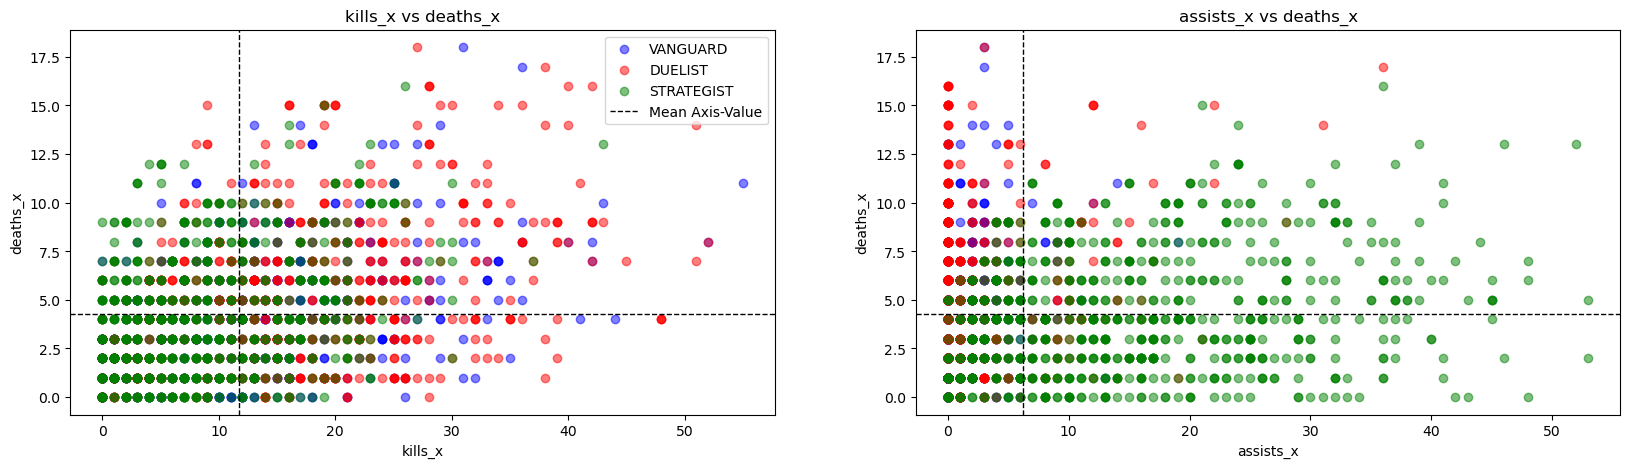

In [8]:
# check kills_x vs deaths_x against win/loss
mean_kills = df['kills_x'].mean()
mean_deaths = df['deaths_x'].mean()
mean_assists = df['assists_x'].mean()

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].scatter(data=df_van, x='kills_x', y='deaths_x', alpha=0.5, c='blue')
axs[0].scatter(data=df_dps, x='kills_x', y='deaths_x', alpha=0.5, c='red')
axs[0].scatter(data=df_supp, x='kills_x', y='deaths_x', alpha=0.5, c='green')
axs[0].axhline(mean_deaths, color='black', linestyle='dashed', linewidth=1)
axs[0].axvline(mean_kills, color='black', linestyle='dashed', linewidth=1)
axs[0].set_xlabel('kills_x')
axs[0].set_ylabel('deaths_x')
axs[0].set_title('kills_x vs deaths_x')
axs[0].legend(['VANGUARD', 'DUELIST' , 'STRATEGIST', 'Mean Axis-Value'])

axs[1].scatter(data=df_van, x='assists_x', y='deaths_x', alpha=0.5, c='blue')
axs[1].scatter(data=df_dps, x='assists_x', y='deaths_x', alpha=0.5, c='red')
axs[1].scatter(data=df_supp, x='assists_x', y='deaths_x', alpha=0.5, c='green')
axs[1].axhline(mean_deaths, color='black', linestyle='dashed', linewidth=1)
axs[1].axvline(mean_assists, color='black', linestyle='dashed', linewidth=1)
axs[1].set_xlabel('assists_x')
axs[1].set_ylabel('deaths_x')
axs[1].set_title('assists_x vs deaths_x')


plt.show()

Text(0.5, 1.0, 'assists_x vs deaths_x (VANGUARD)')

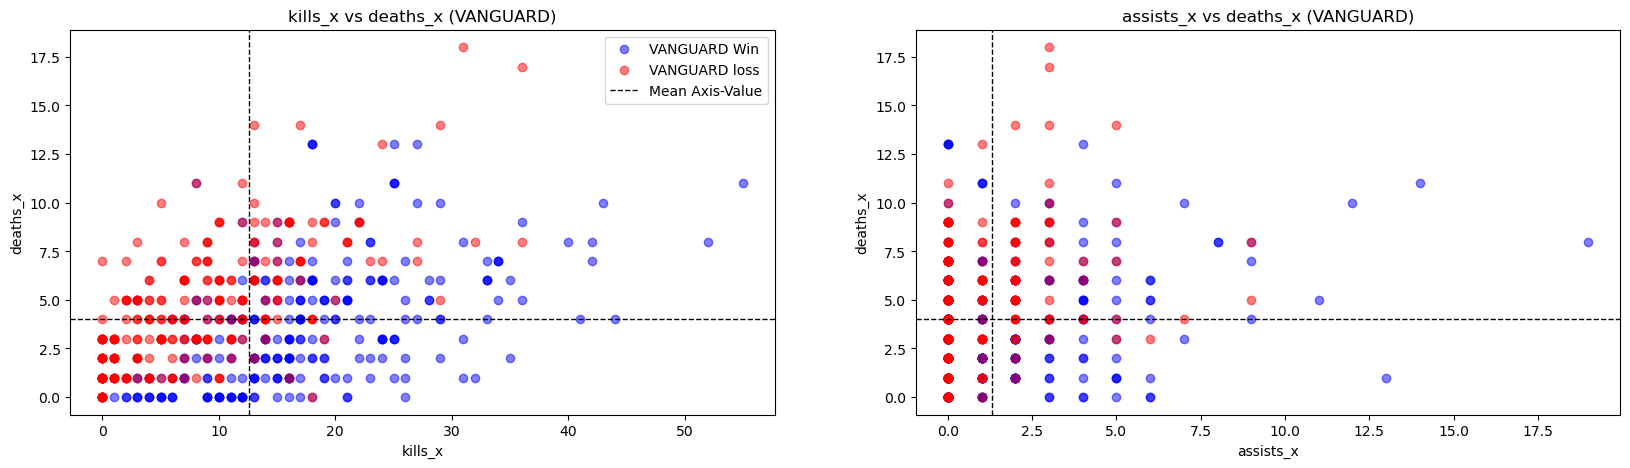

In [9]:
# check kills_x vs deaths_x against win/loss
mean_kills = df_van['kills_x'].mean()
mean_deaths = df_van['deaths_x'].mean()
mean_assists = df_van['assists_x'].mean()

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].scatter(data=df_van_w, x='kills_x', y='deaths_x', alpha=0.5, c='blue')
axs[0].scatter(data=df_van_l, x='kills_x', y='deaths_x', alpha=0.5, c='red')
axs[0].axhline(mean_deaths, color='black', linestyle='dashed', linewidth=1)
axs[0].axvline(mean_kills, color='black', linestyle='dashed', linewidth=1)
axs[0].set_xlabel('kills_x')
axs[0].set_ylabel('deaths_x')
axs[0].set_title('kills_x vs deaths_x (VANGUARD)')
axs[0].legend(['VANGUARD Win', 'VANGUARD loss' , 'Mean Axis-Value'])

axs[1].scatter(data=df_van_w, x='assists_x', y='deaths_x', alpha=0.5, c='blue')
axs[1].scatter(data=df_van_l, x='assists_x', y='deaths_x', alpha=0.5, c='red')
axs[1].axhline(mean_deaths, color='black', linestyle='dashed', linewidth=1)
axs[1].axvline(mean_assists, color='black', linestyle='dashed', linewidth=1)
axs[1].set_xlabel('assists_x')
axs[1].set_ylabel('deaths_x')
axs[1].set_title('assists_x vs deaths_x (VANGUARD)')

Text(0.5, 1.0, 'assists_x vs deaths_x (DUELIST)')

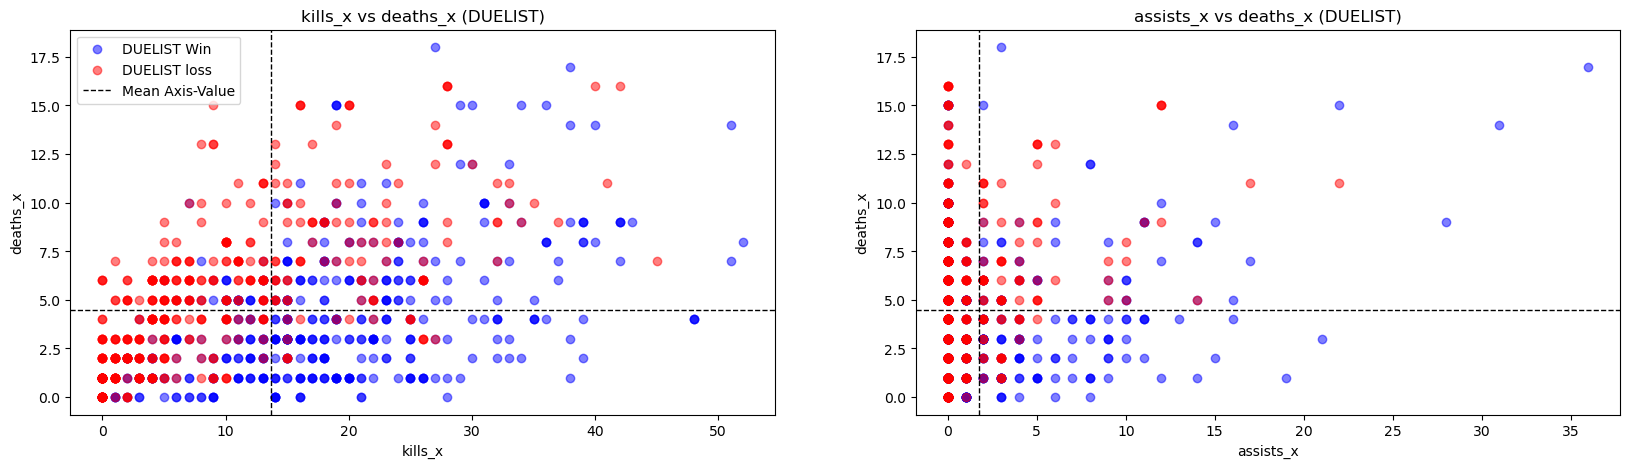

In [10]:
# check kills_x vs deaths_x against win/loss
mean_kills = df_dps['kills_x'].mean()
mean_deaths = df_dps['deaths_x'].mean()
mean_assists = df_dps['assists_x'].mean()

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].scatter(data=df_dps_w, x='kills_x', y='deaths_x', alpha=0.5, c='blue')
axs[0].scatter(data=df_dps_l, x='kills_x', y='deaths_x', alpha=0.5, c='red')
axs[0].axhline(mean_deaths, color='black', linestyle='dashed', linewidth=1)
axs[0].axvline(mean_kills, color='black', linestyle='dashed', linewidth=1)
axs[0].set_xlabel('kills_x')
axs[0].set_ylabel('deaths_x')
axs[0].set_title('kills_x vs deaths_x (DUELIST)')
axs[0].legend(['DUELIST Win', 'DUELIST loss' , 'Mean Axis-Value'])

axs[1].scatter(data=df_dps_w, x='assists_x', y='deaths_x', alpha=0.5, c='blue')
axs[1].scatter(data=df_dps_l, x='assists_x', y='deaths_x', alpha=0.5, c='red')
axs[1].axhline(mean_deaths, color='black', linestyle='dashed', linewidth=1)
axs[1].axvline(mean_assists, color='black', linestyle='dashed', linewidth=1)
axs[1].set_xlabel('assists_x')
axs[1].set_ylabel('deaths_x')
axs[1].set_title('assists_x vs deaths_x (DUELIST)')

Text(0.5, 1.0, 'assists_x vs deaths_x (STRATEGIST)')

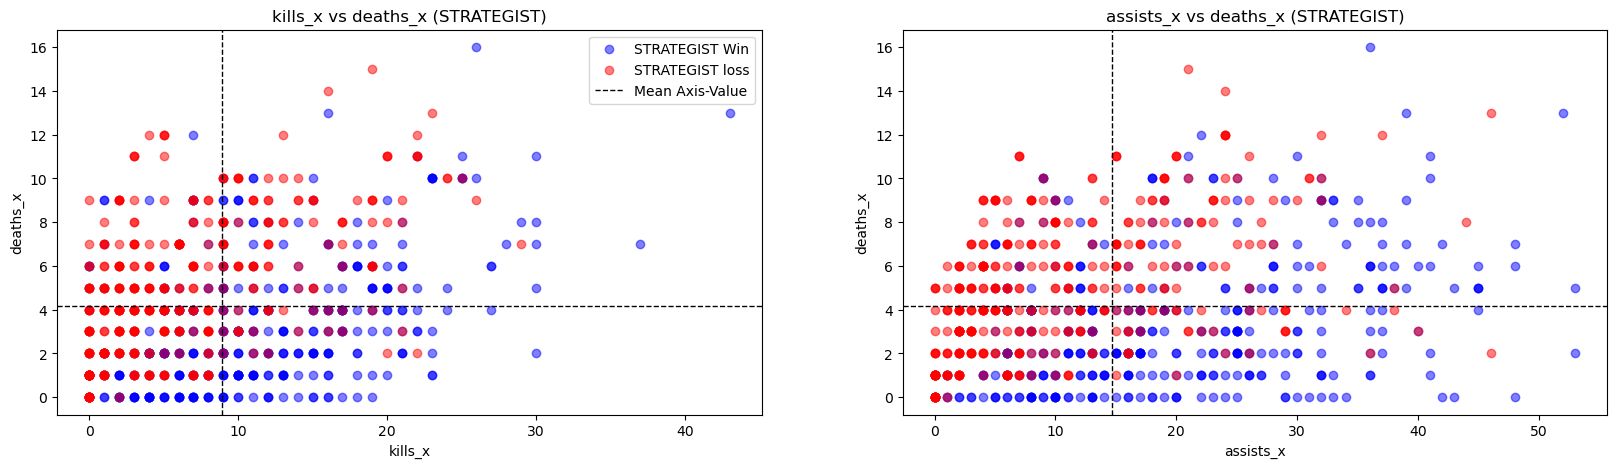

In [11]:
# check kills_x vs deaths_x against win/loss
mean_kills = df_supp['kills_x'].mean()
mean_deaths = df_supp['deaths_x'].mean()
mean_assists = df_supp['assists_x'].mean()

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].scatter(data=df_supp_w, x='kills_x', y='deaths_x', alpha=0.5, c='blue')
axs[0].scatter(data=df_supp_l, x='kills_x', y='deaths_x', alpha=0.5, c='red')
axs[0].axhline(mean_deaths, color='black', linestyle='dashed', linewidth=1)
axs[0].axvline(mean_kills, color='black', linestyle='dashed', linewidth=1)
axs[0].set_xlabel('kills_x')
axs[0].set_ylabel('deaths_x')
axs[0].set_title('kills_x vs deaths_x (STRATEGIST)')
axs[0].legend(['STRATEGIST Win', 'STRATEGIST loss' , 'Mean Axis-Value'])

axs[1].scatter(data=df_supp_w, x='assists_x', y='deaths_x', alpha=0.5, c='blue')
axs[1].scatter(data=df_supp_l, x='assists_x', y='deaths_x', alpha=0.5, c='red')
axs[1].axhline(mean_deaths, color='black', linestyle='dashed', linewidth=1)
axs[1].axvline(mean_assists, color='black', linestyle='dashed', linewidth=1)
axs[1].set_xlabel('assists_x')
axs[1].set_ylabel('deaths_x')
axs[1].set_title('assists_x vs deaths_x (STRATEGIST)')

We can see from the scatterplots that the lower right quadrant formed by the intersecting axes' lines is the ideal region to be in (above average `kills` , while below average `deaths`). 

What is *most interesting* though, is that this trend stays true for assists, which are difficult to achieve on the **DUELIST** and **VANGUARD** roles. 

As a **STRATEGIST**, you are as likely secure a win if you assist in as many kills per match than if you were to participate in the kill itself. 

This can imply a *risk vs. reward* gameplay scenario where the optimal outcome (winning) is achieved by critical decision making surrounding a fight. 
- is it optimal to assist in the kill? or is my damage neglible as supporting my teammate would be more effective?
- supporting abilities are strongest for creating `assists` which suggest match wins come down to ult usage by **STRATEGISTS**
***

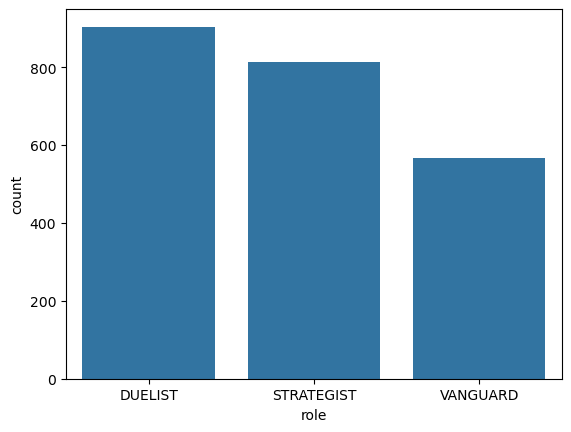

In [12]:
# lets look at hero playrate and role rate
sns.countplot(x = 'role',
              data = df,
              order = df['role'].value_counts().index)
plt.show()

<Figure size 2500x2000 with 0 Axes>

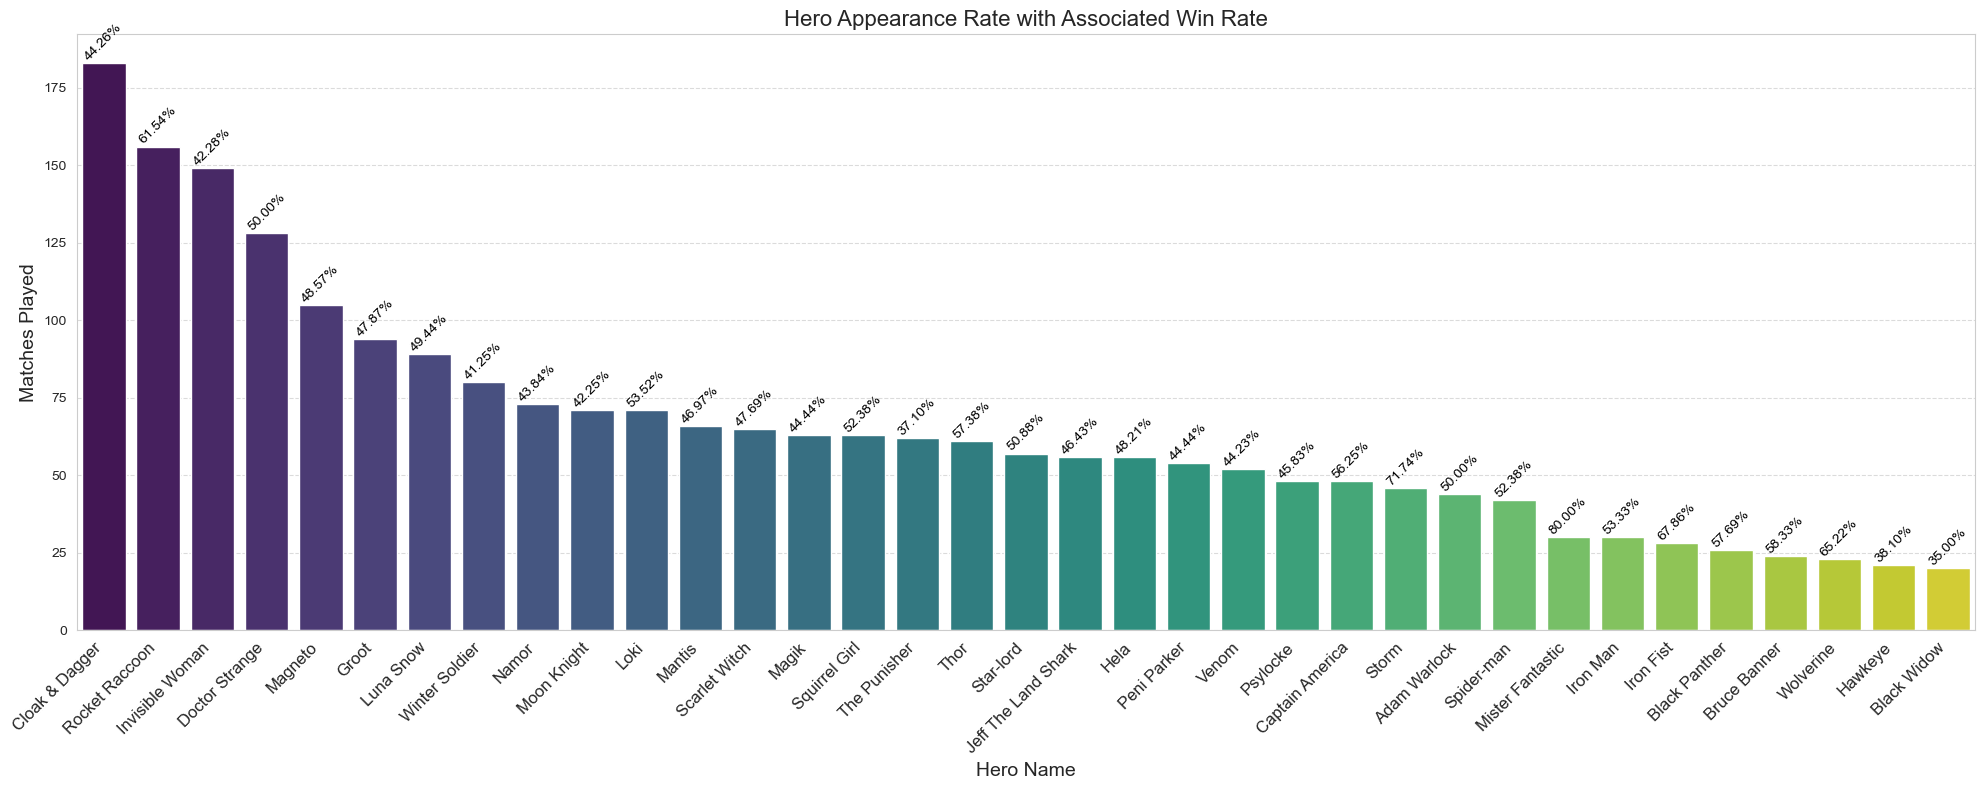

In [20]:
# Set a style for the plot
sns.set_style("whitegrid")
plt.figure(figsize=[25, 20])


# Group by hero_id_x and calculate the win rate
winrate_df = df.groupby('hero_name').agg(
    matches_played=('hero_id_x', 'count'),
    matches_won=('is_win', 'sum')
).reset_index()

# Calculate win rate
winrate_df['win_rate'] = winrate_df['matches_won'] / winrate_df['matches_played']

# Plot the win rate on top of each bar in the seaborn countplot
plt.figure(figsize=[20, 8])
ax = sns.barplot(
    x='hero_name', 
    y='matches_played', 
    data=winrate_df, 
    order=winrate_df.sort_values('matches_played', ascending=False)['hero_name'],
    palette="viridis"
)
plt.xlabel('Hero Name', fontsize=14)
plt.ylabel('Matches Played', fontsize=14)
plt.title('Hero Appearance Rate with Associated Win Rate', fontsize=16)
plt.xticks(rotation=45, fontsize=12, ha='right')

# Add win rate text on top of each bar
for p in ax.patches:
    hero_name = p.get_x() + p.get_width() / 2
    hero_name_str = ax.get_xticklabels()[int(hero_name)].get_text()
    if hero_name_str in winrate_df['hero_name'].values:
        win_rate = winrate_df[winrate_df['hero_name'] == hero_name_str].win_rate.values[0]
        ax.annotate(f'{win_rate:.2%}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', 
                    va='bottom', 
                    fontsize=10, 
                    color='black', 
                    rotation=45)

# Add gridlines for better readability
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

A general overview of the data (counts per role) and which heroes appear most often with their respective winrate.

***
# Scientific Summary

## Objective
The primary objective of this analysis is to explore the performance and characteristics of heroes in the dataset, grouped by their roles, and to evaluate their impact on match outcomes.



### Role-Based Analysis
1. **Role Distribution**:
    - The dataset contains heroes categorized into three primary roles: VANGUARD, DUELIST, and STRATEGIST.
    - A count plot revealed that DUELIST heroes are the most frequently played, followed by STRATEGIST and VANGUARD.

2. **Performance Metrics**:
    - Scatter plots of `kills_x`, `deaths_x`, and `assists_x` against win/loss outcomes showed distinct patterns for each role.
    - VANGUARD heroes tend to have higher survivability, while DUELIST heroes exhibit higher kill counts.

3. **Win/Loss Analysis**:
    - Role-specific win/loss scatter plots highlighted the importance of balanced performance metrics (kills, deaths, assists) for achieving victories.

### Hero-Specific Analysis
1. **Hero Play Rate**:
    - Heroes like Rocket Raccoon and Cloak & Dagger have the highest match appearances, indicating their popularity in gameplay.

2. **Win Rate Distribution**:
    - Heroes such as Mister Fantastic and Storm exhibit the highest win rates, suggesting their effectiveness in matches.
    - Conversely, heroes like The Punisher and Black Widow have lower win rates, indicating potential challenges in their gameplay.

3. **Hero-Specific Insights**:
    - The win rate annotation on the play rate bar plot provided a clear visualization of hero performance relative to their popularity.

### Statistical Observations
1. **Mean Metrics**:
    - The average kills, deaths, and assists across all roles were calculated as:
      - Mean Kills: 8.91
      - Mean Deaths: 4.17
      - Mean Assists: 14.68
    - These metrics serve as benchmarks for evaluating individual hero performance.

2. **Role-Specific Trends**:
    - **is_win Correlation with Kills**:
        - Across all roles, scatterplots reveal a positive correlation between the number of kills (`kills_x`) and the likelihood of winning (`is_win`).
        - Higher kill counts often indicate greater offensive impact, which directly contributes to securing objectives and team success.
        - This trend is consistent across **VANGUARD**, **DUELIST**, and **STRATEGIST** roles, emphasizing the importance of offensive contributions in achieving victories.
